###  Model For House Price Predication

1. Data Cleaning
2. Feature Engineering
3. Modeling & Evaluation
3. Ensemble Methods

In [1]:
import  pandas  as  pd
import  matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## import the dataset 
train_data=pd.read_csv("B:\\train_v2\\train_house.csv")
test_data=pd.read_csv("B:\\train_v2\\test_house.csv")

### Data PreProcessing


### Handling Missing data

In [3]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

#### Checking the data in Train DataSet

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


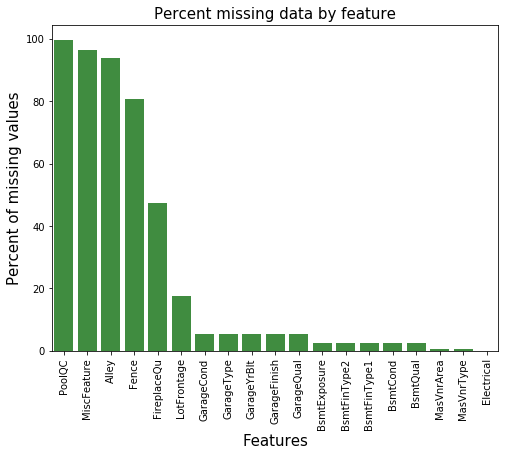

In [4]:
missingdata(train_data)

### Checking the missing Data in Test dataset

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


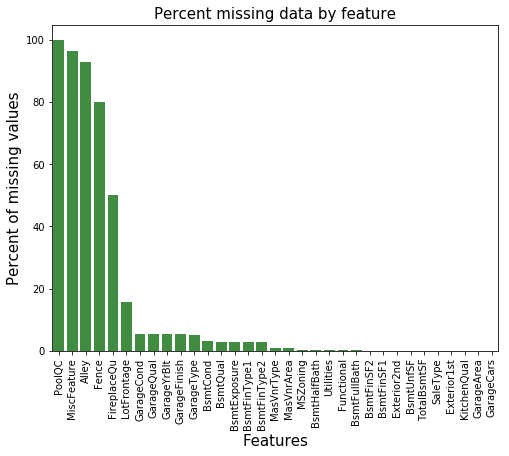

In [5]:
missingdata(test_data)

In [6]:
## combine test and train as single to apply some function
df=[train_data,test_data]

***LotFrontage*** : Since the area of each street connected to the house property most likely have a similar area to other houses in its **neighborhood** , we can fill in missing values by the median LotFrontage of the neighborhood.

In [7]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

####   by see the  above given value its clear most GarageFinish are in UNF,RFn,Fin which we do not know the mean so we will the NONE is NaN so that become one codition

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these **categorical basement-related features**, replace is nAn with NOne

In [8]:
for dataset in df:
    col=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
         'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           "MasVnrType",'MSSubClass']
    dataset[col]=dataset[col].fillna('None')

In [9]:
for dataset in df:
    co=['GarageYrBlt', 'GarageArea', 'GarageCars',
         'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
         "MasVnrArea"]
    dataset[co]=dataset[co].fillna(0)

In [10]:
test_data["MSZoning"].fillna(test_data["MSZoning"].mode()[0], inplace = True)
train_data["MSZoning"].fillna(train_data["MSZoning"].mode()[0], inplace = True)

In [11]:


test_data["Functional"].fillna("Typ", inplace = True)
train_data["Functional"].fillna("Typ", inplace = True)
test_data["Electrical"].fillna(test_data["Electrical"].mode()[0], inplace = True)
train_data["Electrical"].fillna(train_data["Electrical"].mode()[0], inplace = True)
test_data["KitchenQual"].fillna(test_data["KitchenQual"].mode()[0], inplace = True)
train_data["KitchenQual"].fillna(train_data["KitchenQual"].mode()[0], inplace = True)
test_data["SaleType"].fillna(test_data["SaleType"].mode()[0], inplace = True)
train_data["SaleType"].fillna(train_data["SaleType"].mode()[0], inplace = True)
test_data["Exterior1st"].fillna(test_data["Exterior1st"].mode()[0], inplace = True)
train_data["Exterior1st"].fillna(train_data["Exterior1st"].mode()[0], inplace = True)
test_data["Exterior2nd"].fillna(test_data["Exterior2nd"].mode()[0], inplace = True)
train_data["Exterior2nd"].fillna(train_data["Exterior2nd"].mode()[0], inplace = True)


Due to large number years value are present i am not able find the exacted year to fill the missing data so i fill the missing value with 0

In [12]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

In [13]:
train_data = train_data.drop(['Utilities'], axis=1)
test_data = test_data.drop(['Utilities'], axis=1)
##Utilities : For this categorical feature all records are "AllPub", except for one 
###"NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
##this feature won't help in predictive modelling. We can then safely remove it.

In [14]:
train_data = train_data.drop(['Id'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

In [15]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


### checking missing are still present in the both Dataset

In [16]:
print(train_data.isnull().sum()[train_data.isnull().sum()>0])
print(test_data.isnull().sum()[test_data.isnull().sum()>0])

Series([], dtype: int64)
Series([], dtype: int64)


### Features Engineering

In [17]:
### Remove outliers
print("Before remove the Outliers",train_data.shape[0])
train_data.drop(train_data[(train_data['OverallQual']<5) & (train_data['SalePrice']>200000)].index, inplace=True)
train_data.drop(train_data[(train_data['GrLivArea']>4000)].index, inplace=True)
train_data.reset_index(drop=True, inplace=True)
print("After remove the Outliers",train_data.shape[0])

Before remove the Outliers 1460
After remove the Outliers 1455


In [18]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
y_train = train_data.SalePrice.values
df_full=pd.concat([train_data,test_data], ignore_index=True)
df_full.drop(['SalePrice'], axis=1, inplace=True)

### Convert some numerical features into categorical features so that it will more useful to get dummines value and we can easy perform the Label encoding


In [19]:
df_full['MSSubClass'] = df_full['MSSubClass'].apply(str)
df_full['OverallCond'] = df_full['OverallCond'].astype(str)
df_full['YrSold'] = df_full['YrSold'].astype(str)
df_full['MoSold'] = df_full['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for col_names in cols:
    labenc = LabelEncoder() 
    labenc.fit(list(df_full[col_names].values)) 
    df_full[col_names] = labenc.transform(list(df_full[col_names].values))

# shape        
print('Shape all_data: {}'.format(df_full.shape))

Shape all_data: (2914, 78)


Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [21]:
#df_full['2ndFlrSF'].value_counts()
df_full['2ndFlrSF'] = df_full['2ndFlrSF'].astype(float)
df_full['1stFlrSF'] = df_full['1stFlrSF'].astype(float)
df_full['TotalBsmtSF'] = df_full['TotalBsmtSF'].astype(float)

In [22]:
# Adding total sqfootage feature 
df_full['TotalSF'] = df_full['TotalBsmtSF'] + df_full['1stFlrSF'] + df_full['2ndFlrSF']

### skew Features

In [23]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_feats = df_full.dtypes[df_full.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_full[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.928383
PoolArea,18.698593
LotArea,13.277205
LowQualFinSF,12.078203
3SsnPorch,11.366100
LandSlope,4.992643
KitchenAbvGr,4.297992
BsmtFinSF2,4.142042
EnclosedPorch,4.000022
ScreenPorch,3.942711


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of [Math Processing Error].


In [24]:
skewness = skewness[abs(skewness) > 0.65]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_full[feat] = boxcox1p(df_full[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [25]:
df_full = pd.get_dummies(df_full)
print(df_full.shape)

(2914, 220)


### Getting the new train and test sets.

In [26]:
train = df_full[:ntrain]
test = df_full[ntrain:]

In [27]:
print(train.shape)
print(test.shape)

(1455, 220)
(1459, 220)


Now that our dataset is ready for modeling, we must prepare it from training, testing and prediction. One of the vital steps here is to reduce the number of features. I will do this using XGBoost's inbuilt feature importance functionality.

In [30]:

from sklearn.feature_selection import SelectFromModel
xgb_train = train.copy()
xgb_test = test.copy()
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1455, 49) 
X_test:  (1459, 49)


In [37]:
# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')



# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Model selection packages imported!
Deprecation warning will be ignored!
Metrics packages imported!
Algorithm packages imported!


### Model Building


We are finally ready to Build our models. For this analysis I am using 5 different algorithms:

Kernel Ridge Regression

Lasso

Gradient Boosting

Random Forest Regressor

XGBoost

PCA

The method of measuring accuracy was chosen to be Root Mean Squared Error, as described within the competition.

Now that our dataset is ready for modeling, we must prepare it from training, testing and prediction. One of the vital steps here is to reduce the number of features. I will do this using XGBoost's inbuilt feature importance functionality.

In [31]:
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

xgb_train = train.copy()
xgb_test = test.copy()
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat.transform(xgb_train)
xgb_test = xgb_feat.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1455, 49) 
X_test:  (1459, 49)


### split the Data 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)


X_train:  (1018, 49) 
X_test:  (437, 49) 
Y_train:  (1018,) 
Y_test:  (437,)


### Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation we are doing 10 Flod Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rms_cv(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [38]:
import xgboost as xgb
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), 
          BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/
    #generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, 
                                                 scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...
7 RandomForestRegressor trained...
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",11.717,12.009
1,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",37.831,38.581
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",39.103,39.787
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",12.955,12.497
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",11.772,12.021
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",12.423,12.745
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",15.092,13.734
7,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",12.783,12.236


In [39]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: 
    #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((Y_test-gs_alg.predict(X_test))**2).mean())
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)*100
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare
    

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...
7 RandomForestRegressor trained...
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 0.1, 'coef0': 100, 'degree': 1, 'gam...",11.843,12.218
1,ElasticNet,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",11.918,12.368
2,Lasso,"{'alpha': 0.0005, 'copy_X': True, 'fit_interce...",11.742,12.228
3,GradientBoostingRegressor,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",12.113,12.602
4,BayesianRidge,"{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X':...",11.772,12.021
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 1e...",12.423,12.745
6,RandomForestRegressor,"{'max_depth': None, 'max_features': 'auto', 'm...",14.127,13.175
7,XGBRegressor,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",12.201,12.080


Overall we can see that the training and test scores for each of the models have decreased, which is what we want.

Now we have a set of highly tuned algorithms to use for Stacking.

### Now that we have a set of highly tuned algorithms, a rather famous and successful technique to further improve the accuracy of these models, is to use Stacking. Let me explain what this mean

In [40]:
models = [KernelRidge(), ElasticNet(), Lasso(),
          GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 
         'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, 
               BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    
    row_index+=1
    
print('Done')
    

1 KernelRidge predictions added to stacking validation dataset...
1 KernelRidge predictions added to stacking test dataset...
--------------------------------------------------
2 ElasticNet predictions added to stacking validation dataset...
2 ElasticNet predictions added to stacking test dataset...
--------------------------------------------------
3 Lasso predictions added to stacking validation dataset...
3 Lasso predictions added to stacking test dataset...
--------------------------------------------------
4 GradientBoostingRegressor predictions added to stacking validation dataset...
4 GradientBoostingRegressor predictions added to stacking test dataset...
--------------------------------------------------
5 BayesianRidge predictions added to stacking validation dataset...
5 BayesianRidge predictions added to stacking test dataset...
--------------------------------------------------
6 LassoLarsIC predictions added to stacking validation dataset...
6 LassoLarsIC predictions added

In [41]:
stacked_validation_train.head()

,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,11.727339,11.730058,11.731607,11.765508,11.729099,11.745401,11.751967,11.759749
1,12.090804,12.086206,12.088324,12.062417,12.094210,12.090428,12.016161,12.027900
2,11.837439,11.834003,11.836459,11.815516,11.840583,11.828164,11.778102,11.816875
3,11.434341,11.426905,11.421077,11.404322,11.435332,11.398893,11.509052,11.448546
4,12.678608,12.684157,12.682840,12.675266,12.680629,12.664236,12.620889,12.730858


In [42]:
stacked_test_train.head()

,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,11.684951,11.688908,11.688214,11.792409,11.681788,11.652278,11.721063,11.736709
1,12.024513,12.038893,12.028815,12.026421,12.014730,11.965299,11.991099,12.029814
2,12.098788,12.094514,12.098676,12.193181,12.098575,12.110701,12.151362,12.134274
3,12.164962,12.167990,12.173255,12.203299,12.166530,12.162378,12.152918,12.199599
4,12.148191,12.165471,12.158782,12.082713,12.145889,12.141604,12.240751,12.189172


In [43]:
# First drop the Lasso results from the table, as we will be using Lasso as the meta-model
drop = ['Lasso']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

# Now fit the meta model and generate predictions
meta_model = make_pipeline(RobustScaler(), Lasso(alpha=0.00001, copy_X = True, fit_intercept = True,
                                              normalize = False, precompute = False, max_iter = 10000,
                                              tol = 0.0001, selection = 'random', random_state = None))
meta_model.fit(stacked_validation_train, Y_test)

meta_model_pred = np.expm1(meta_model.predict(stacked_test_train))
print("Meta-model trained and applied!...")

Meta-model trained and applied!...


In [44]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(),
          LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 
         'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, 
               BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
final_predictions = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[0], value = np.expm1(gs_best.predict(stacked_test_train)))
    print(row_index+1, alg.__class__.__name__, 'final results predicted added to table...')
    names.pop(0)
    
    row_index+=1

print("-"*50)
print("Done")
    
final_predictions.head()

1 KernelRidge final results predicted added to table...
2 ElasticNet final results predicted added to table...
3 Lasso final results predicted added to table...
4 GradientBoostingRegressor final results predicted added to table...
5 BayesianRidge final results predicted added to table...
6 LassoLarsIC final results predicted added to table...
7 RandomForestRegressor final results predicted added to table...
8 XGBRegressor final results predicted added to table...
--------------------------------------------------
Done


,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,122502.115068,122797.510447,120424.827516,117193.793840,121550.424663,121304.417255,119924.213541,120330.953125
1,164779.394603,165026.461461,164456.452272,172344.200323,158617.822143,159558.429730,168839.213578,170821.593750
2,185010.993165,184755.641508,182105.235649,176220.037128,185376.856200,185258.064167,171020.419391,177497.875000
3,193711.560596,193836.177956,192316.631596,196712.959835,192662.321612,192797.101255,190406.076118,193861.203125
4,189796.581813,190218.837877,188650.097083,179396.046870,188638.098470,188104.116630,179954.499968,178869.531250


In [48]:
test_data=pd.read_csv("B:\\train_v2\\test_house.csv")
test_ID=test_data['Id']

In [49]:
ensemble = meta_model_pred*(1/10) + final_predictions['XGBoost']*(1.5/10) + final_predictions['Gradient Boosting']*(2/10) + final_predictions['Bayesian Ridge']*(1/10) + final_predictions['Lasso']*(1/10) + final_predictions['KernelRidge']*(1/10) + final_predictions['Lasso Lars IC']*(1/10) + final_predictions['Random Forest']*(1.5/10)

submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ensemble
submission.to_csv('final_submission.csv',index=False)
print("Submission file, created!")

Submission file, created!
